In [76]:
import tonic
from tonic import SlicedDataset, slicers, transforms
import torch
import torchvision

In [101]:
trainset = tonic.datasets.DVSGesture('data', train=True)
testset = tonic.datasets.DVSGesture('data', train=False)

frame_time = 150_000 # microseconds
slicer = slicers.SliceByTime(time_window=frame_time)
transform = transforms.Compose([
    transforms.CenterCrop(sensor_size=trainset.sensor_size, size=(100, 100)),
    transforms.Downsample(spatial_factor=64/100),
    transforms.ToTimesurface(sensor_size=(64, 64, 2), dt=frame_time, tau=frame_time/10),
    lambda x: torch.tensor(x.squeeze()*255/x.max()),
])
sliced_dataset = SlicedDataset(trainset, slicer=slicer, metadata_path=f"metadata/slicing/{frame_time}", transform=transform)
sliced_dataset_test = SlicedDataset(testset, slicer=slicer, metadata_path=f"metadata/slicing/test/{frame_time}", transform=transform)

Metadata read from metadata/slicing/150000/slice_metadata.h5.
Metadata read from metadata/slicing/test/150000/slice_metadata.h5.


In [96]:
surf, label = sliced_dataset[9000]


torch.Size([3, 64, 64])

Create a folder datasets/dvs-gesture/train and test and create subfolders in there that are named class0 to class10, much like the cifar10 folder. If you're using zsh, you can create multiple folders like so: mkdir class{0..10}

In [97]:
import tqdm

ds_path = "datasets/dvs-gesture/train/class"

for i, (surf, label) in tqdm.tqdm(enumerate(sliced_dataset)):
    surf = torch.cat((surf, torch.zeros((1, 64, 64))), dim=0)
    torchvision.utils.save_image(surf, ds_path+f"{label}/img_{i}.png")

45822it [04:00, 190.33it/s]


In [104]:
ds_path = "datasets/dvs-gesture/test/class"

for i, (surf, label) in tqdm.tqdm(enumerate(sliced_dataset_test)):
    surf = torch.cat((surf, torch.zeros((1, 64, 64))), dim=0)
    torchvision.utils.save_image(surf, ds_path+f"{label}/img_{i}.png")

3985it [00:25, 208.42it/s]

In [49]:
surf.shape

(2, 64, 64)

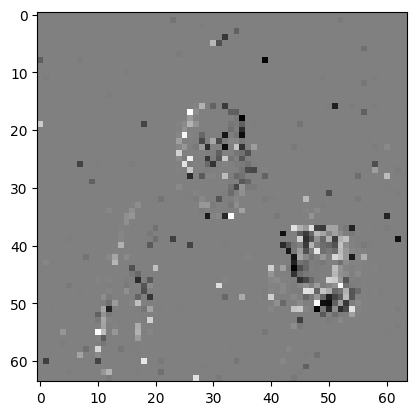

In [50]:
import matplotlib.pyplot as plt

surf_diff = surf[1] - surf[0]
plt.imshow(surf_diff, cmap='gray')

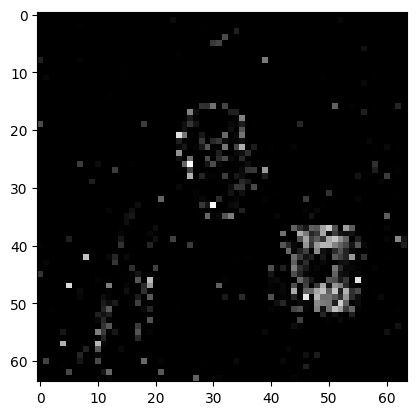

In [51]:
plt.imshow(surf.sum(0), cmap='gray')